<ipython-input-3-2e904e0df810>:12: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kdd20.csv')


Veri Setinin Başı:
    column 0  column 1 column 2  column 3 column 4  column 5  column 6  \
0       NaN         0      tcp  ftp_data       SF       491       0.1   
1       0.0         0      udp     other       SF       146       0.0   
2       1.0         0      tcp   private       S0         0       0.0   
3       2.0         0      tcp      http       SF       232    8153.0   
4       3.0         0      tcp      http       SF       199     420.0   

   column 7  column 8  column 9  ...  column 34  column 35  column 36  \
0       0.2       0.3       0.4  ...       0.17       0.03     0.17.1   
1       0.0       0.0       0.0  ...       0.00       0.60       0.88   
2       0.0       0.0       0.0  ...       0.10       0.05          0   
3       0.0       0.0       0.0  ...       1.00       0.00       0.03   
4       0.0       0.0       0.0  ...       1.00       0.00          0   

   column 37  column 38  column 39  column 40  column 41  column 42  column 43  
0       0.25       0.

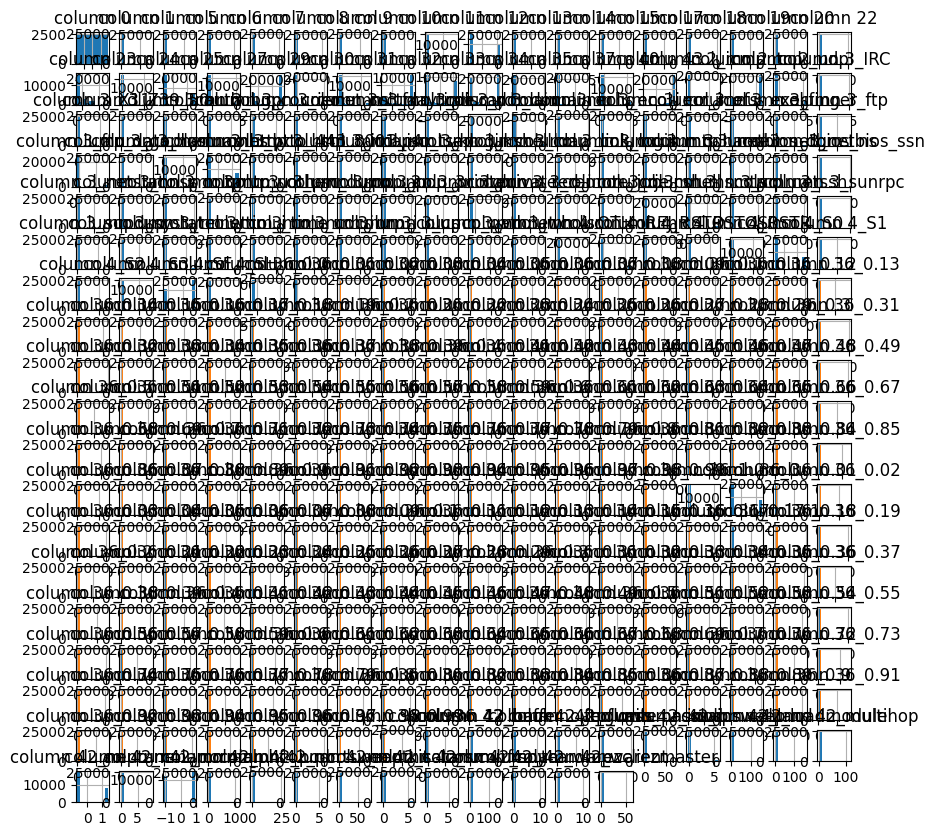

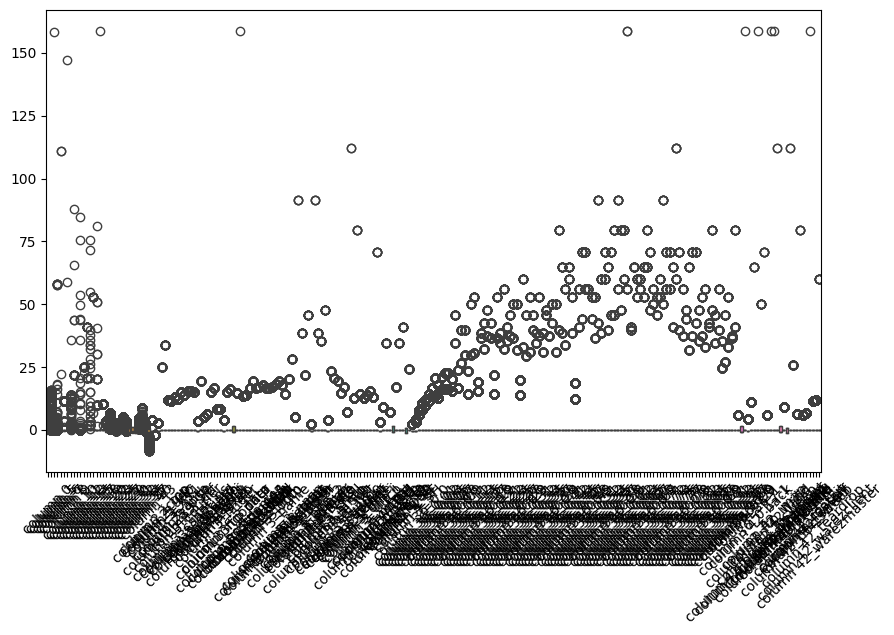

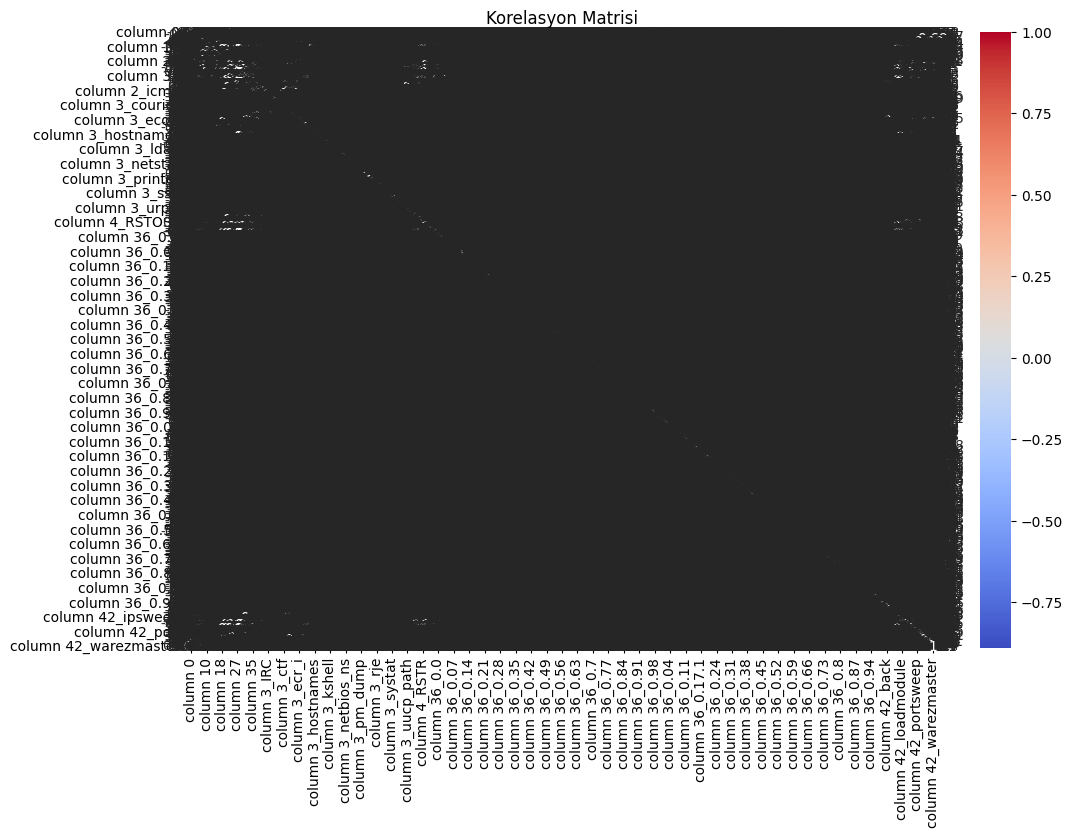

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

# Veri setini yükle
df = pd.read_csv('kdd20.csv')

# Veri setini gözlemle
print("Veri Setinin Başı:\n", df.head())

# Eksik değerleri kontrol et ve doldur
missing_values = df.isnull().sum()
print("Eksik Değerler:\n", missing_values)

for column in df.columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].mean(), inplace=True)

# Kategorik sütunları geçici olarak kaldır
categorical_columns = df.select_dtypes(include=['object']).columns
df_temp = df.drop(categorical_columns, axis=1)

# Korelasyon matrisini hesapla ve yüksek korelasyonlu sütunları kaldır
corr_matrix = df_temp.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)

# Kategorik sütunları one-hot encoding yap
df = pd.get_dummies(df)

# Özellikleri standardize et
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Veri setinin özet istatistiklerini incele
print("Özet İstatistikler:\n", scaled_df.describe())

# Veri setinin dağılımını incele ve görselleştir
# Histogramlar
scaled_df.hist(figsize=(10, 10))
plt.show()
# Kutu grafikleri (boxplots)
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=45)
plt.show()

# Korelasyon matrisi
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()



In [ ]:
print(df.columns)


Index(['column 0', 'column 1', 'column 5', 'column 6', 'column 7', 'column 8',
       'column 9', 'column 10', 'column 11', 'column 12',
       ...
       'column 42_phf', 'column 42_pod', 'column 42_portsweep',
       'column 42_rootkit', 'column 42_satan', 'column 42_smurf',
       'column 42_spy', 'column 42_teardrop', 'column 42_warezclient',
       'column 42_warezmaster'],
      dtype='object', length=337)


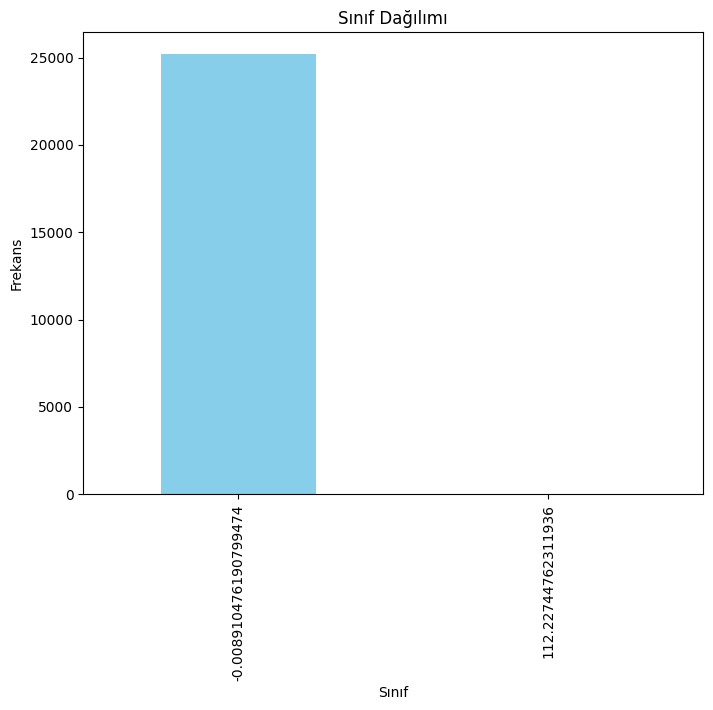

float64
Accuracy Score:
 0.9998676898650437
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7557
           1       0.00      0.00      0.00         1

    accuracy                           1.00      7558
   macro avg       0.50      0.50      0.50      7558
weighted avg       1.00      1.00      1.00      7558



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


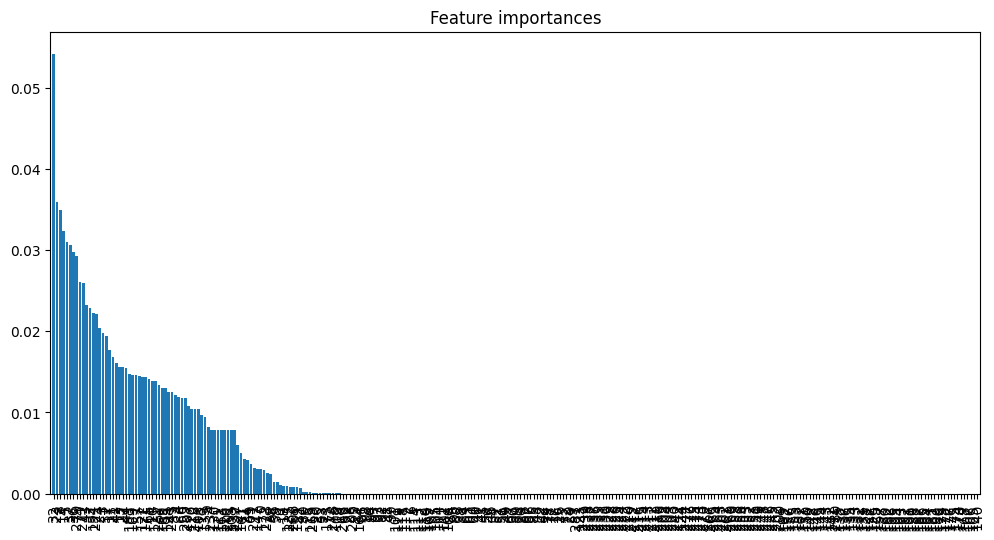

Özellik Önemleri:
 [3.03326025e-03 1.45841604e-02 0.00000000e+00 1.97348473e-02
 1.18435927e-02 3.09386045e-02 0.00000000e+00 1.06170602e-03
 3.49586680e-02 8.15919849e-03 1.38974011e-02 0.00000000e+00
 5.47256342e-05 1.56250000e-02 3.23404950e-02 9.66128242e-03
 0.00000000e+00 1.76795131e-02 1.94161858e-05 9.84483983e-04
 1.17958418e-04 1.67692909e-02 0.00000000e+00 3.58901090e-02
 2.03551168e-02 7.29068855e-06 0.00000000e+00 1.55862265e-02
 8.54979896e-06 0.00000000e+00 0.00000000e+00 1.94627789e-02
 5.41737611e-02 2.28097397e-02 4.18152422e-03 8.55301621e-05
 2.97690435e-02 3.05698598e-02 0.00000000e+00 2.40576351e-03
 0.00000000e+00 0.00000000e+00 1.60917880e-02 2.32391849e-02
 1.54338492e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.51762478e-05 0.00000000e+00 1.30215718e-02
 0.00000000e+00 1.45105743e-02 1.43097754e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.50656444e-05 0.00000000e+00
 0.00

In [ ]:
# Sınıf dağılımını görselleştir
plt.figure(figsize=(8, 6))
scaled_df["column 42_phf"].value_counts().plot(kind="bar", color="skyblue")  # column42 yerine hedef değişken adını kullanın
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Frekans")
plt.show()

# PCA uygulanması
pca = PCA(n_components=0.95)  # Varyansın %95'ini koruyacak şekilde bileşenleri seç
principalComponents = pca.fit_transform(scaled_df.drop("column 42_phf", axis=1))  # Hedef değişkeni çıkarın
principalDf = pd.DataFrame(data=principalComponents)

# Hedef değişkeni geri ekle
finalDf = pd.concat([principalDf, scaled_df[['column 42_phf']]], axis=1)

# Veri setini eğitim ve test setlerine ayır
X = finalDf.drop('column 42_phf', axis=1)
y = finalDf['column 42_phf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(y_train.dtypes)
# Örneğin, hedef değişkenin adı 'target' olsun
df["column 42_phf"] = df["column 42_phf"].astype('category')

# Hedef değişkeni yeniden tanımlayın
y_train = y_train.astype('category').cat.codes
y_test = y_test.astype('category').cat.codes




model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap ve değerlendirme
y_pred = model.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Özellik önemlerini görselleştir (PCA sonrası özellikler anonimleşir, bu yüzden PCA bileşenlerini kullanacağız)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Özellik önemlerini görselleştir
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Sonuçları özetle ve raporla
print("Özellik Önemleri:\n", importances)
print("Model Başarımı:\n", accuracy_score(y_test, y_pred))
